# Compreensão dos dados

Neste notebook vamos fazer forcar na segunda parte do método CRISP-DS.

In [2]:
# importando bibliotecas

# manipulação de dados
import pandas as pd # type: ignore
import numpy as np # type: ignore

# visualização
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from IPython.display import HTML # type: ignore
import plotly.graph_objects as go # type: ignore

# Algumas configurações
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
# Configuração para o notebook e plotagem de imagens
%matplotlib inline
def jupyter_settings():
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container { width:100% !important; }</style>'))
    sns.set()

jupyter_settings()

## 1. Importando o conjunto de dados

In [4]:
df_raw = pd.read_csv('../data/Abandono_clientes.csv', sep=',')

In [5]:
# Visualizando as primeiras linhas
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Visualizando as ultimas linhas
df_raw.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Conferindo as dimensões do conjunto de dados

print(f'Quantidade de linhas: {df_raw.shape[0]}')
print(f'Quantidade de colunas: {df_raw.shape[1]}')

Quantidade de linhas: 10000
Quantidade de colunas: 14


Como descrito no enunciado do desafio, temos 10000 linhas e 14 colunas.

Vamos criar um dicionário que guarde a descrição das colunas facilitando a identificação quando necessário.

In [8]:
# Dicionário de descrição das colunas

dict_colunas = {
    "RowNumber": "Número da linha no conjunto de dados, usado apenas como identificador.",
    "CustomerId": "Identificador único do cliente.",
    "Surname": "Sobrenome do cliente.",
    "CreditScore": "Pontuação de crédito do cliente.",
    "Geography": "País ou região de origem do cliente.",
    "Gender": "Gênero do cliente (masculino ou feminino).",
    "Age": "Idade do cliente.",
    "Tenure": "Número de anos que o cliente tem como cliente do banco.",
    "Balance": "Saldo atual na conta bancária do cliente.",
    "NumOfProducts": "Número de produtos bancários que o cliente utiliza.",
    "HasCrCard": "Indica se o cliente possui um cartão de crédito (1 = sim, 0 = não).",
    "IsActiveMember": "Indica se o cliente é um membro ativo do banco (1 = sim, 0 = não).",
    "EstimatedSalary": "Salário estimado do cliente.",
    "Exited": "Indica se o cliente saiu do banco (1 = sim, 0 = não)."
}

dict_colunas

{'RowNumber': 'Número da linha no conjunto de dados, usado apenas como identificador.',
 'CustomerId': 'Identificador único do cliente.',
 'Surname': 'Sobrenome do cliente.',
 'CreditScore': 'Pontuação de crédito do cliente.',
 'Geography': 'País ou região de origem do cliente.',
 'Gender': 'Gênero do cliente (masculino ou feminino).',
 'Age': 'Idade do cliente.',
 'Tenure': 'Número de anos que o cliente tem como cliente do banco.',
 'Balance': 'Saldo atual na conta bancária do cliente.',
 'NumOfProducts': 'Número de produtos bancários que o cliente utiliza.',
 'HasCrCard': 'Indica se o cliente possui um cartão de crédito (1 = sim, 0 = não).',
 'IsActiveMember': 'Indica se o cliente é um membro ativo do banco (1 = sim, 0 = não).',
 'EstimatedSalary': 'Salário estimado do cliente.',
 'Exited': 'Indica se o cliente saiu do banco (1 = sim, 0 = não).'}

## 1.1 Checagem da tipologia dos dados

Vamos verificar a estrutura do dado com o intuito de identificar possíveis dados ausentes, inconsistências e outros fatores.

Com o objetivo de não afetar os dados originais, vamos fazer uma cópia.

In [9]:
# Copia para as possíveis alterações não afear is dados originais
df_raw_1 = df_raw.copy()

In [10]:
# Criando um dataframe que contem a quantidade de dados nulos, o tipo e valores únicos
pd.DataFrame({"dados_nulos": df_raw_1.isna().mean(),
              "tipos_dados": df_raw_1.dtypes,
              "Valores_unicos": df_raw_1.nunique()})

,dados_nulos,tipos_dados,Valores_unicos
RowNumber,0.0,int64,10000
CustomerId,0.0,int64,10000
Surname,0.0,object,2932
CreditScore,0.0,int64,460
Geography,0.0,object,3
Gender,0.0,object,2
Age,0.0,int64,70
Tenure,0.0,int64,11
Balance,0.0,float64,6382
NumOfProducts,0.0,int64,4


Podemos notar que os dados são condizentes com sua características. Desta forma, vamos manter em seus formatos iniciais.\
E que também não temos dados faltantes.

## 2. Analise Descritiva

Vamos separar nosso dados em dois dataframes, um categóricos e outro numérico. 

Se olharmos novamente no `dict_colunas` temos uma descrição das colunas nos auxiliando a separar as colunas em:

| Coluna | Tipo |
|----|----|
| 'RowNumber'| Numérico|
| 'CustomerId'| Categórico|
| 'Surname'| Categórico|
| 'CreditScore'| Numérico|
| 'Geography'| Categórico|
| 'Gender'| Categórico|
| 'Age'| Numérico|
| 'Tenure'| Numérico|
| 'Balance'| Numérico|
| 'NumOfProducts'| Numérico|
| 'HasCrCard'| Categórico|
| 'IsActiveMember'| Categórico|
| 'EstimatedSalary'| Numérico|
| 'Exited'| Categórico|

Aqui podemos identificar também que as variáveis RowNumber, CustomerId e Surname, não serão uteis tanto na analise descritiva como na previsão, pois não possuem valor de analise.

In [11]:
# realizando a divisão dos dados

cat_atributos = df_raw_1[['Gender', 'Geography', 'HasCrCard', 'IsActiveMember','Exited']]
num_atributos = df_raw_1[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','Exited']]

### 2.1 Analise Descritiva Categóricos

Vamos analisar uma proporção de churn em cada variável categórica, uma vez que os números absolutos individualmente não nos fornecem o contexto sobre o dado que representam. Mas quando relacionamos os números absolutos com o total correspondente, conseguimos criar métricas  ou proporções que permitem:

- Comparar e contextualizar;
- Identificar padrões;
- Normalizar dados para comparação justa, etc.

Vamos criar uma função para extrair a proporção de churn, em cada variável.

In [12]:
# Extraindo a proporção de clientes que abandonaram o banco por variável categórica
def extrai_proporcao_exited(variavel, df_raw_1):

    count1 = df_raw_1[[variavel, 'Exited']]

    var_Exited = count1[count1['Exited'] == 1].groupby(variavel, as_index = False).count()

    count2 = df_raw_1[[variavel, 'Exited']].groupby(variavel, as_index = False).count()
    count2.rename(columns = {"Exited": "total_cust"}, inplace=True)

    var_Exited['total_cust'] = count2['total_cust']
    var_Exited['%Exited'] = var_Exited['Exited']/count2['total_cust']
    var_Exited = var_Exited.sort_values(by='%Exited', ascending=False)

    return var_Exited

In [13]:
# Executando a função para variável Geography
geograf_exited = extrai_proporcao_exited('Geography', df_raw_1)

In [14]:
geograf_exited.head()

,Geography,Exited,total_cust,%Exited
1,Germany,814,2509,0.324432
2,Spain,413,2477,0.166734
0,France,810,5014,0.161548


/tmp/ipykernel_351183/1934160074.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), size=12, fontweight='bold')


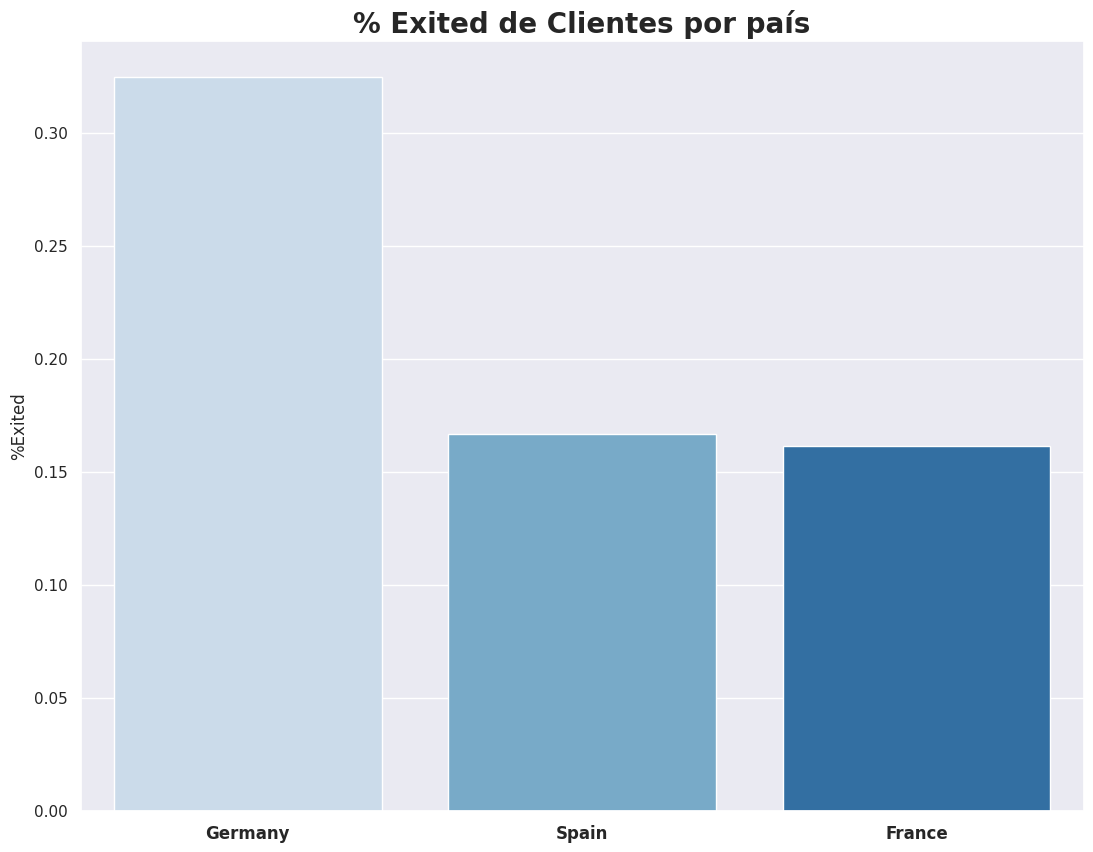

In [15]:
# Configurar a figura e os eixos
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2, rowspan=2)

# Gráfico de barras
sns.barplot(
    x='Geography',
    y='%Exited',
    data=geograf_exited,
    palette='Blues'  # Mantém o palette, pois é válido com `hue=None`
)

# Ajustes nos rótulos do eixo X
ax1.set_xticklabels(ax1.get_xticklabels(), size=12, fontweight='bold')
ax1.set(xlabel=None)

# Título do gráfico
ax1.set_title("% Exited de Clientes por país", fontsize=20, fontweight='bold')

# Exibir o gráfico
plt.show()


Podemos observar que a Alemanha possui a maior taxa de Exited ($32\%$), Espanha e França possuem praticamente o mesmo valor ($16\%$) de taxa.

Vamos proceder com a mesma analise, mas para as outras variáveis categóricas

In [16]:
cat_atributos

,Gender,Geography,HasCrCard,IsActiveMember,Exited
0,Female,France,1,1,1
1,Female,Spain,0,1,0
2,Female,France,1,0,1
3,Female,France,0,0,0
4,Female,Spain,1,1,0
...,...,...,...,...,...
9995,Male,France,1,0,0
9996,Male,France,1,1,0
9997,Female,France,0,1,1
9998,Male,Germany,1,0,1


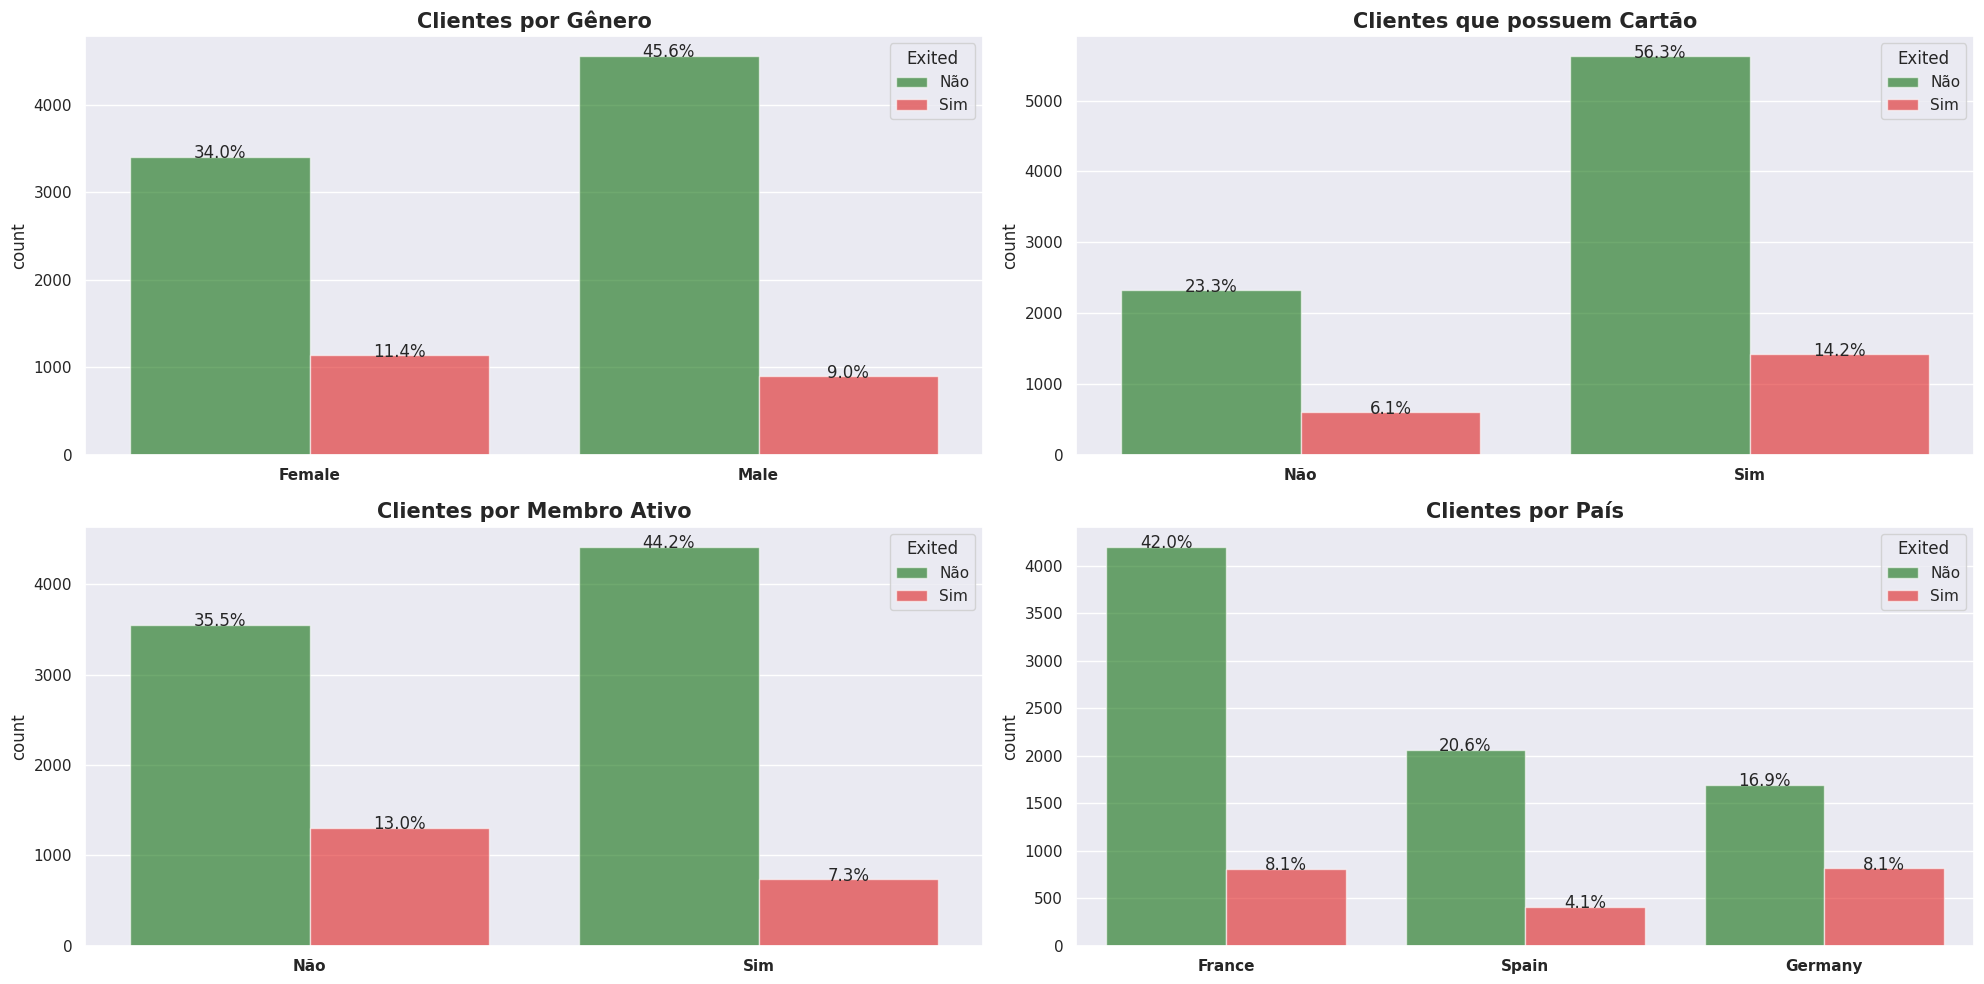

In [17]:
# Função para criar gráficos personalizados
def create_countplot(ax, x_var, data, hue_var, title, xlabels=None):
    # Gráfico com barras
    plot = sns.countplot(
        x=x_var, data=data, hue=hue_var, ax=ax, palette=["green", "red"], alpha=0.6, hue_order=[0, 1]
    )
    
    # Ajustar legenda
    handles, labels = plot.get_legend_handles_labels()
    ax.legend(handles, ['Não', 'Sim'], title='Exited')
    
    # Adicionar porcentagens nas barras
    for p in plot.patches:
        if p.get_height() > 0:
            percentage = '{:.1f}%'.format(100 * p.get_height() / float(len(data)))
            x = p.get_x() + p.get_width() / 2
            y = p.get_height() + 40
            plot.annotate(percentage, (x, y), ha='center', va='center')
    
    # Configuração dos rótulos do eixo X
    if xlabels:
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(xlabels, size=11, fontweight='bold')
    else:
        ax.set_xticks(range(len(ax.get_xticklabels())))  # Define explicitamente os ticks
        ax.set_xticklabels(ax.get_xticklabels(), size=11, fontweight='bold')  # Define os rótulos
    
    # Título
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set(xlabel=None)

# Criar a figura
fig = plt.figure(figsize=(20, 10))

# Gráfico por Gênero
ax1 = plt.subplot2grid((2, 2), (0, 0))
create_countplot(ax1, 'Gender', df_raw_1, 'Exited', "Clientes por Gênero")

# Gráfico por HasCrCard
ax2 = plt.subplot2grid((2, 2), (0, 1))
create_countplot(ax2, 'HasCrCard', df_raw_1, 'Exited', "Clientes que possuem Cartão", xlabels=['Não', 'Sim'])

# Gráfico por IsActiveMember
ax3 = plt.subplot2grid((2, 2), (1, 0))
create_countplot(ax3, 'IsActiveMember', df_raw_1, 'Exited', "Clientes por Membro Ativo", xlabels=['Não', 'Sim'])


ax4 = plt.subplot2grid((2, 2), (1, 1))
create_countplot(ax4, 'Geography', df_raw_1, 'Exited', "Clientes por País")

# Ajustar layout
plt.tight_layout()
plt.savefig("../imagens/clientes_por_variavel_valor_total.png")
plt.show()


Temos uma analise da quantidade e a $\%$ do total, porém não é uma leitura totalmente correta, note que todas as barras maiores tem uma quantidade maior de não **Exited**, isso pode ocorrer em função do volume. Para termos uma avaliação proporcional, devemos extrair uma porção, semelhante o que fizemos no gráfico por país.

Portanto, vamos extrair a proporção de cada variável.

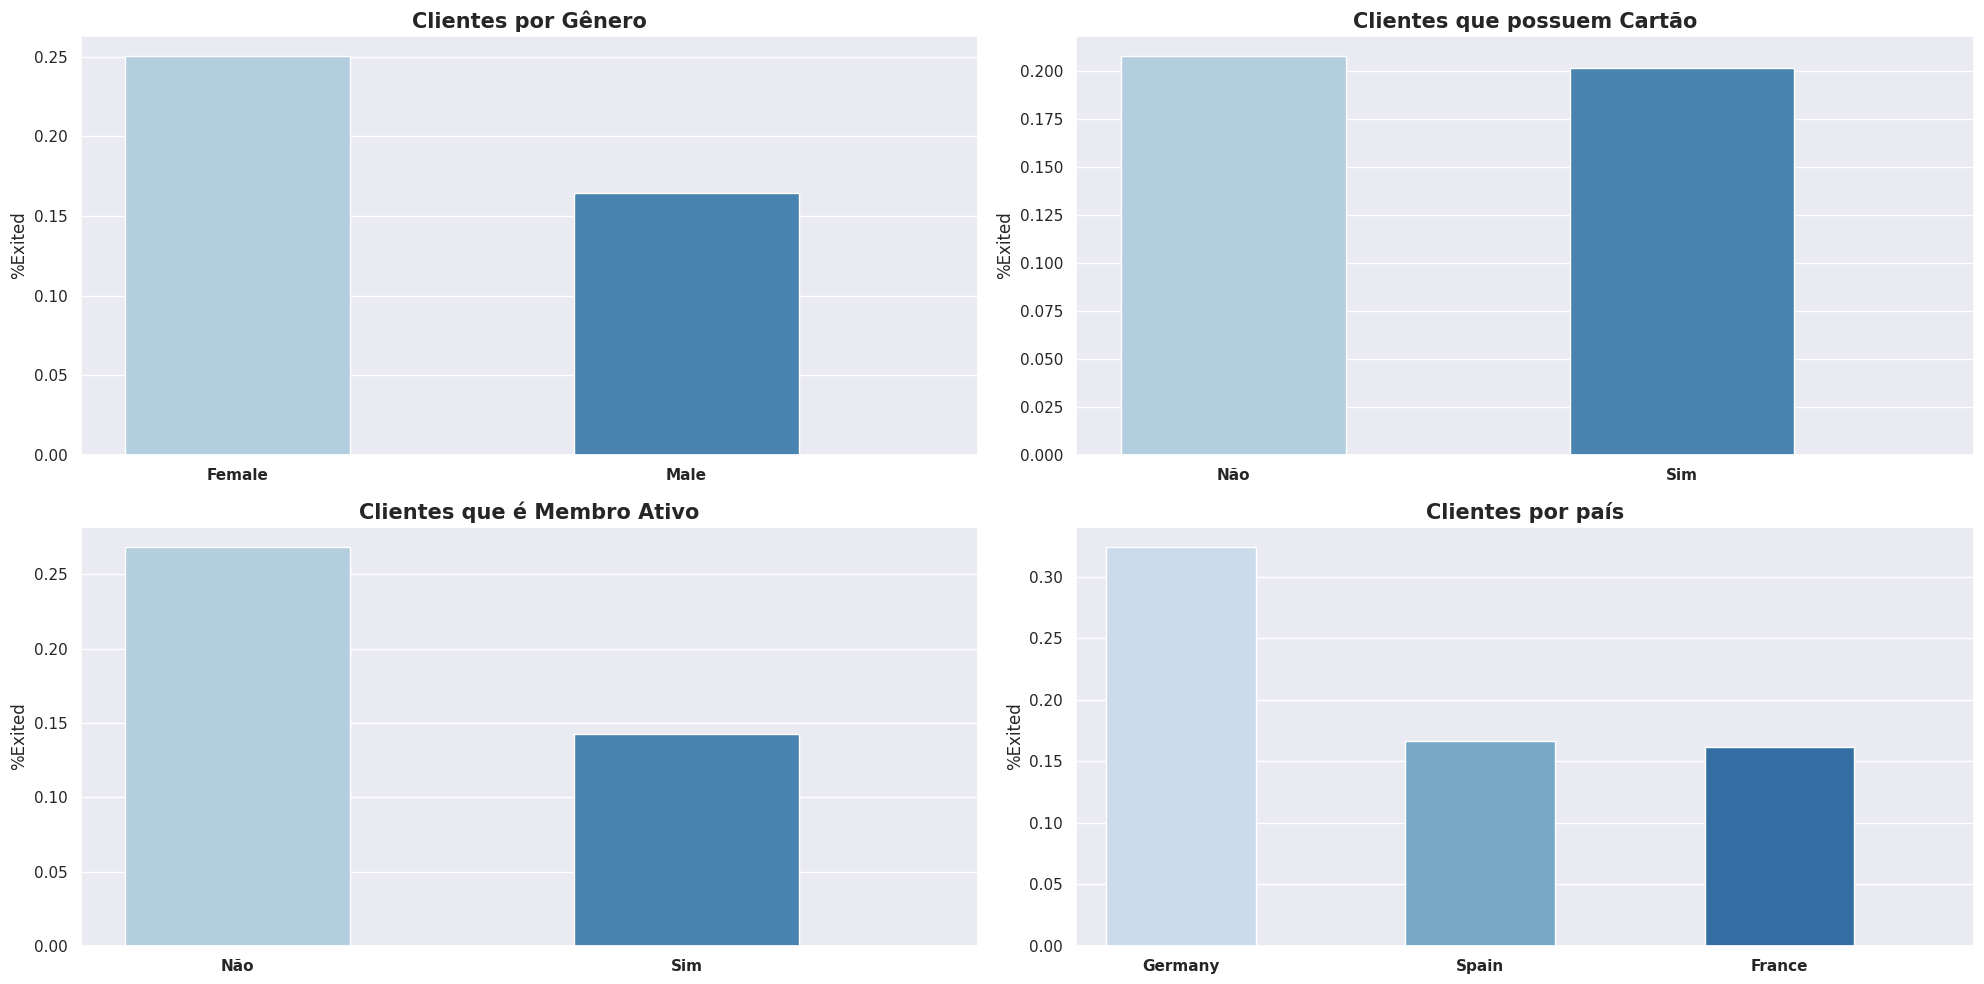

In [18]:
def create_barplot(ax, x_var,data, title, palette='Blues', xlabels=None,  bar_width=.5):

    # Pega as proporções de Exited por variável
    proporcao_exited = extrai_proporcao_exited(x_var, data)


    # Gráfico com barras
    sns.barplot(x = x_var,
                y='%Exited',
                data=proporcao_exited,
                palette=palette,
                ax =ax)
    # Ajustar largura das barras
    for bar in ax.patches:
        bar.set_width(bar_width)
    
    # Reposicionar os ticks no centro das barras
    ticks_positions = [bar.get_x() + bar.get_width() / 2 for bar in ax.patches]
    ax.set_xticks(ticks_positions)

    # Configuração dos rótulos do eixo X
    if xlabels:
        ax.set_xticklabels(xlabels, size=11, fontweight='bold')
    else:
        ax.set_xticklabels(ax.get_xticklabels(), size=11, fontweight='bold')
    
    # Título
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set(xlabel=None)


fig = plt.figure(figsize=(20, 10))

# Gráfico por Gênero
ax1 = plt.subplot2grid((2, 2), (0, 0))
create_barplot(ax1, 'Gender', df_raw_1, "Clientes por Gênero")

ax2 = plt.subplot2grid((2, 2), (0, 1))
create_barplot(ax2, 'HasCrCard', df_raw_1, "Clientes que possuem Cartão",  xlabels=['Não', 'Sim'])

ax3 = plt.subplot2grid((2, 2), (1, 0))
create_barplot(ax3, 'IsActiveMember', df_raw_1, "Clientes que é Membro Ativo",  xlabels=['Não', 'Sim'])

ax4 = plt.subplot2grid((2, 2), (1, 1))
create_barplot(ax4, 'Geography', df_raw_1, "Clientes por país")

plt.tight_layout()
plt.savefig("../imagens/clientes_por_variavel_valor_proporcional.png")

plt.show()

Se comparamos os gráficos por valores totais e por proporção, temos:

- No caso de clientes por Gênero, a taxa de cancelamento por valores totais é de $11.4\%$ enquanto em valores proporcionais chega a $25\%$. Obs.: É necessário tomarmos cuidado quando realizarmos analises para não reforçamos preconceitos e não vir ser um viés na analise preditiva. Note que a variável categórica **Gênero** nos indica que proporcionalmente, mulheres tem a maior taxa de cancelamento, este resultado não deve ser usado com o intuito de impedir o acesso delas ao banco, mas sim de entender o motivo da evasão.

- Para clientes que possuem cartão de crédito, em valores totais é possível ver que os clientes que não cancelam é bem maior comparado aos que cancelam, contudo quando olhamos proporcionalmente, a taxa de cancelamento para clientes que possuem ou não possuem cartão é quase o mesmo valor. Este resultado pode nos indicar que esta variável categórica não terá tanto papel na identificação dos usuários durante a predição. 

- Por fim, clientes que não são membros possuem cancelam mais os planos comparados com os que são membros.

### 2.2 Analise Descritiva Numéricas

Nesta etapa vamos olhar para as variáveis numéricas. Vamos iniciar olhando algumas estatísticas descritivas básicas, são elas:

- **Mínimo:** O menor valor;
- **Máximo:** O maior valor;
- **Média:** O valor médio;
- **Desvio Padrão:** Indica o quanto estamos longe da média;
- **Skew (Assimetria):** Mede o grau de distorção ou falta de simetria de uma distribuição em relação a um curva normal
    - **0:** Distribuição simétrica;
    - **Positivo:** Assimetria para a direita (cauda mais longa na direita)
    - **Negativo:** Assimetria para a esquerda (cauda mais longa na esquerda)
- **kurtosis (Curtose):** Mede o grau de concentração dos valores em torno da média, indicando a "altura" e o "achatamento" das caudas da distribuição;
    - **3 (Mesocúrta):** Curtose de uma curva padrão
    - **> 3 (Leptocúrtica):** Caudas mais pesadas e pico mais alto (distribuição com muitos valores extremos).
    - **< 3 (Platicúrtica):** Caudas mais leves e distribuição achatada (distribuição com menos valores extremos).


In [19]:
# Realizando a descrição estatística 
num_atributos_descricao = num_atributos.agg(['min', 'max', 'mean','median', 'std', 'skew', 'kurtosis']).T
num_atributos_descricao['range'] = num_atributos_descricao['max'] - num_atributos_descricao['min']
num_atributos_descricao

,min,max,mean,median,std,skew,kurtosis,range
CreditScore,350.00,850.00,650.528800,652.000,96.653299,-0.071607,-0.425726,500.00
Age,18.00,92.00,38.921800,37.000,10.487806,1.011320,1.395347,74.00
Tenure,0.00,10.00,5.012800,5.000,2.892174,0.010991,-1.165225,10.00
Balance,0.00,250898.09,76485.889288,97198.540,62397.405202,-0.141109,-1.489412,250898.09
NumOfProducts,1.00,4.00,1.530200,1.000,0.581654,0.745568,0.582981,3.00
EstimatedSalary,11.58,199992.48,100090.239881,100193.915,57510.492818,0.002085,-1.181518,199980.90
Exited,0.00,1.00,0.203700,0.000,0.402769,1.471611,0.165671,1.00


Nesta análise inicial dos atributos numéricos incluiu a verificação de métricas de tendência, como média e a mediana, assim como métricas de dispersão. Note, que para a maioria dos dados, a média e a mediana são similares, com exceção do atributo `Balance`, que apresenta uma diferença mais significativa.

#### 2.2.1 Gráficos de Densidade
Vamos plotar as distribuições de cada variável numérica e avaliar os comportamentos.

In [20]:
num_atributos

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0
9996,516,35,10,57369.61,1,101699.77,0
9997,709,36,7,0.00,1,42085.58,1
9998,772,42,3,75075.31,2,92888.52,1


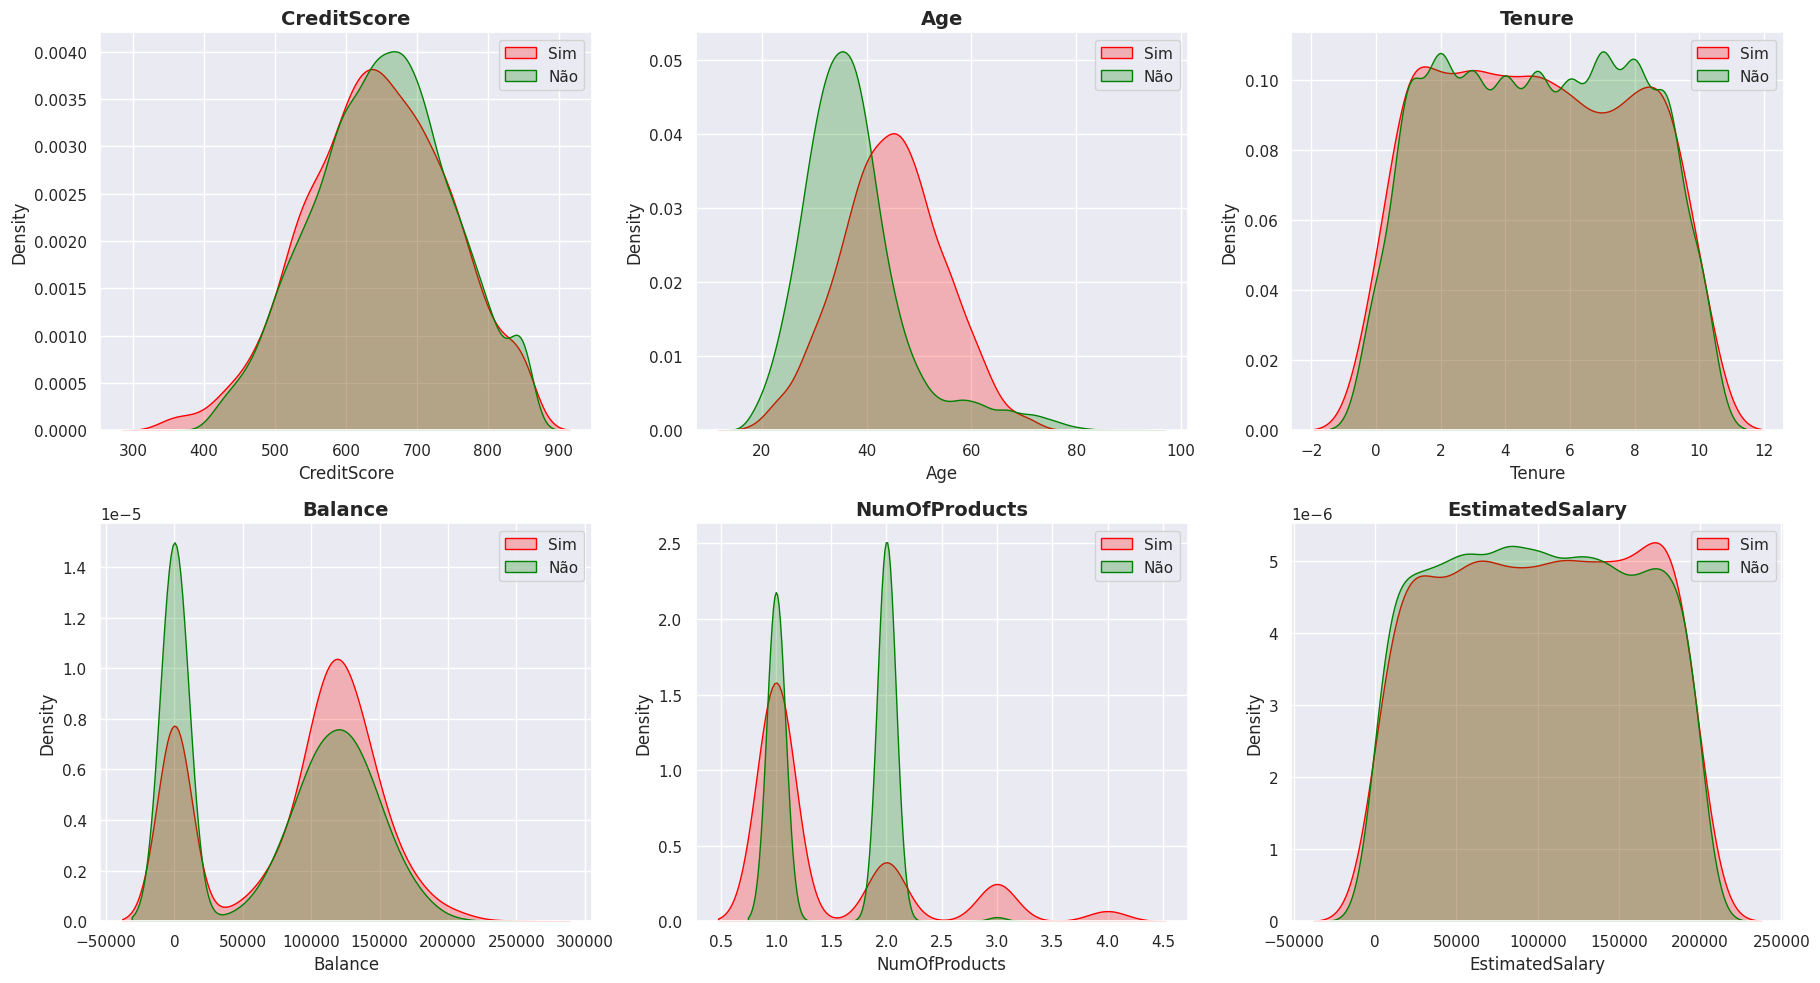

In [22]:
# removendo a coluna Exited
colunas = num_atributos.drop('Exited', axis=1).columns

# Vamos separar as classes deExited e NaoExited
num_atributos_exited = num_atributos[num_atributos['Exited'] == 1]
num_atributos_nao_exited = num_atributos[num_atributos['Exited'] == 0]

# definindo a área de plotagem
nrow = 2
ncol = 3 
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize = (18,10))
fig.subplots_adjust(hspace=1, wspace=1)

# plotando gráfico de densidade
idx = 0
for col in colunas:
    idx += 1
    plt.subplot(nrow, ncol, idx)
    sns.kdeplot(num_atributos_exited[col], label= 'Sim', fill=True, color='red')
    sns.kdeplot(num_atributos_nao_exited[col], label= 'Não', fill=True, color='green')
    plt.title(col, fontsize=14, fontweight='bold')
    plt.legend()


plt.tight_layout()
plt.savefig("../imagens/densidade_das_variaveis.png")
plt.show()

Nesta etapa olhamos para distribuição das variáveis numéricas, algumas conclusões podem ser obtidas:

- Os gráficos de **Tenure** e **EstimatedSalary** apresentam um topo largo, indicando que os valores dessas variáveis estão mais **uniformemente distribuídos** dentro de um certo intervalo. Esta informação indica que não temos um único valor ou faixa de valores dominante. Quando olhamos com o objetivo de prever o **Churn**, tanto o **Tenure** e **EstimatedSalary** não parecem ser um fator decisivo para os clientes saírem ou permanecerem.

- Para os gráficos **Age** e **NumOfProducts** mostram picos estreitos, indicando que há faixas específicas de valores com maior concentração de clientes (com idades específicas ou números de produtos). Estas duas variáveis podem ser uteis na análise preditiva. 

- Para o gráfico **CreditScore** temos uma distribuição simétrica, indicando que os dados estão próximos de uma distribuição normal. Indicando que a maioria dos clientes tem pontuações de crédito numa faixa considerada comum (média e boa). A simetria também indica que não temos uma forte concentração em extremos, como clientes com pontuações muito baixa ou muito alta. Esta variável é importante na análise preditiva, pois clientes com baixo score tem mais dificuldades de acessar serviços ou produtos financeiros, tornando-os mais propensos a abandonar o banco e clientes com altas pontuações podem ser alvos de concorrentes oferecendo melhores condições. Obs.: Por ser um grupo com distribuição simétrica, não será necessário um tratamento tão intenso de outliers.

- No gráfico **Balance** temos dois picos principais:
    - Um pico em **0**, provavelmente clientes sem saldo, com contas inativas ou que utilizam o banco apenas para movimentações pontuais;
    - Um segundo pico numa faixa de saldo mais alta (próxima de 100.000 a 150.000), indicando que estes clientes provavelmente possuem uma conta de poupança ou investimento.
Temos então um comportamento bimodal, sugerindo que o banco atende dois grupos principais, essa segmentação pode indicar que o banco precisa de estratégias para atrair e engajar os dois grupos:
    - **Clientes com saldo baixo:** Ofertas de incentivos para movimentação e engajamento.
    - **Clientes com saldo alto:** Ofertas de produtos premium ou investimentos.
Durante a análise preditiva, provavelmente deveremos tratar esses dois segmentos como classes separadas, assim um não mascara o outro. 

#### 2.2.2 Analisando os Outliers

Os outliers podem influenciar nas análises e no tratamento do modelo preditivo, portanto, vamos buscar identificar os outliers e seus comportamento.

Para tal, vamos plotar o boxplot com o serborn.

In [49]:
num_atributos_exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
2,502,42,8,159660.80,3,113931.57,1
5,645,44,8,113755.78,2,149756.71,1
7,376,29,4,115046.74,4,119346.88,1
16,653,58,1,132602.88,1,5097.67,1
...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,53445.17,1
9982,655,46,7,137145.12,1,115146.40,1
9991,597,53,4,88381.21,1,69384.71,1
9997,709,36,7,0.00,1,42085.58,1


In [50]:
def plot_boxplot_subplots(data, variables_per_subplot, target, YNExited, nrows, ncols, figsize=(15, 10), width=0.2, palette='Set2', name=None):
    """
    Função para criar subplots com gráficos de boxplot usando diferentes variáveis para cada subplot.

    Args:
    - data (DataFrame): O DataFrame contendo os dados.
    - variables_per_subplot (list of lists): Lista onde cada elemento é uma lista de variáveis para um subplot.
    - target (str): Nome da variável alvo (categórica).
    - nrows (int): Número de linhas de subplots.
    - ncols (int): Número de colunas de subplots.
    - figsize (tuple): Tamanho total da figura.
    - width (float): Largura das caixas no boxplot.
    - palette (str): Paleta de cores para os gráficos.

    Returns:
    - None. Exibe os gráficos.
    """
    
    # Criar a figura e os subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Garantir que podemos iterar facilmente pelos eixos

    # Iterar sobre os subplots e as variáveis correspondentes
    for i, (ax, variables) in enumerate(zip(axes, variables_per_subplot)):
        # Transformar os dados para o formato longo (melt)
        melted = data[variables + [target]].melt(
            id_vars=[target],
            var_name='Variable',
            value_name='Value'
        )

        # Criar o boxplot para o subplot atual
        sns.boxplot(y='Variable', x='Value', data=melted, palette=palette, width=width, ax=ax)

        # Ajustar o título e os rótulos
        ax.set_title(f'Distribuição das Variáveis por {target} = {YNExited}', fontsize=15, fontweight='bold')
        ax.set_xlabel('Valores', fontsize=16)
        
        ax.tick_params(axis='x', labelsize=13)
        ax.tick_params(axis='y', labelsize=13)
        if i==0:
            ax.set_ylabel('Variáveis', fontsize=16)
        else:
            ax.set_ylabel(None)


    # Ajustar o layout para evitar sobreposições
    plt.tight_layout()
    plt.savefig(f"../imagens/{name}.png")
    plt.show()


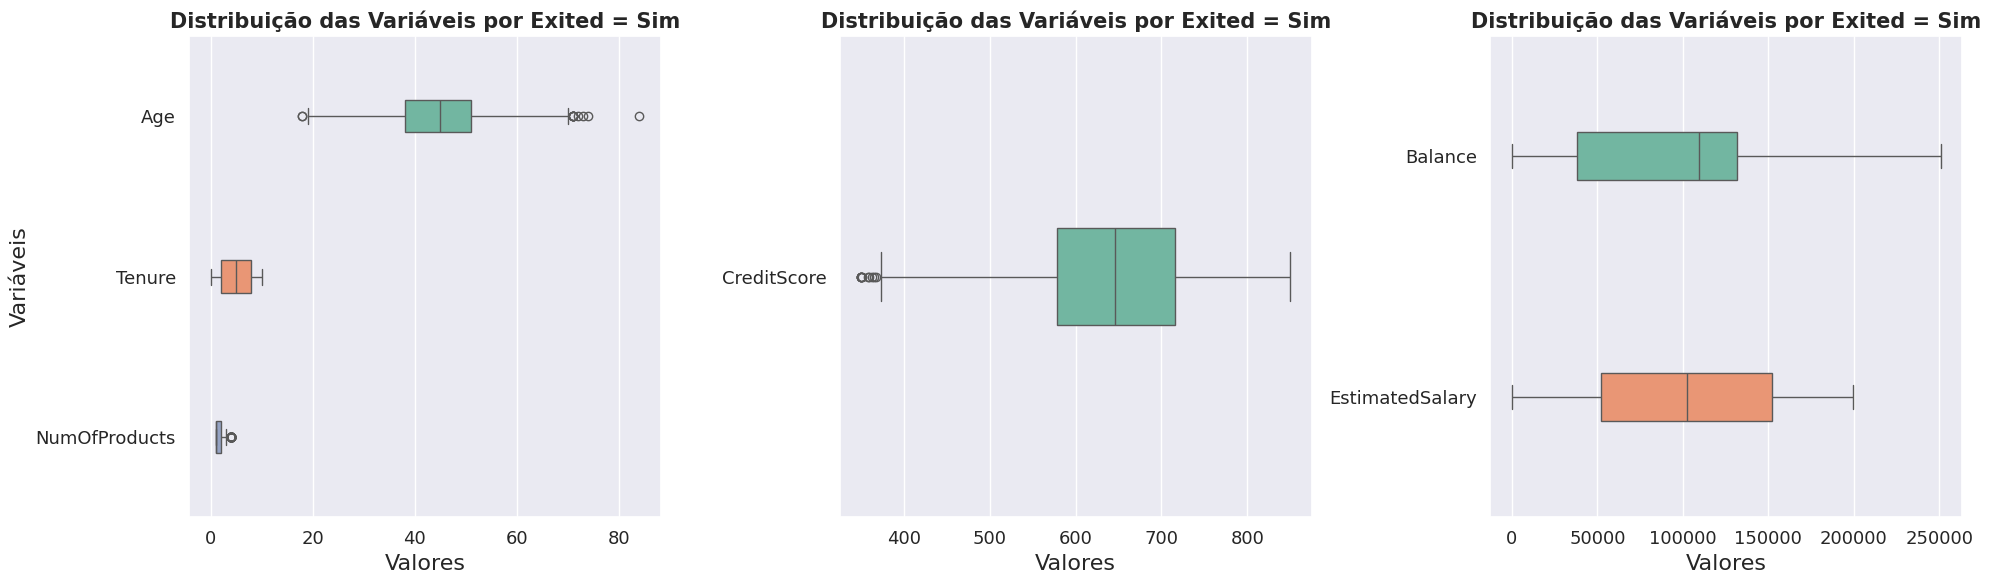

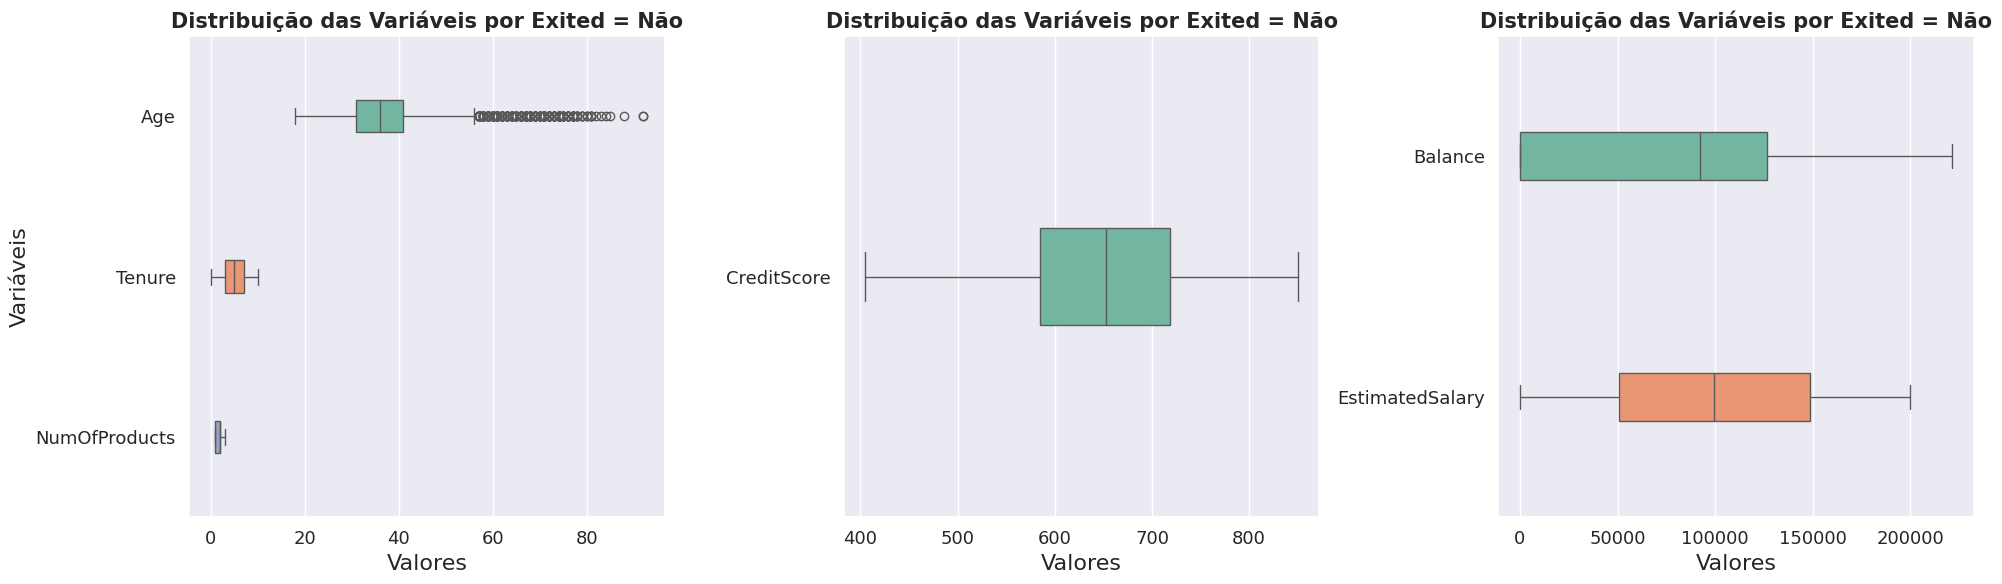

In [51]:
variables_per_subplot = [
    ['Age', 'Tenure', 'NumOfProducts'],          # Variáveis para o subplot 1
    ['CreditScore'],     # Variáveis para o subplot 2
    ['Balance', 'EstimatedSalary'],  # Variáveis para o subplot 3
]
plot_boxplot_subplots(
    data=num_atributos_exited,
    variables_per_subplot=variables_per_subplot,
    target='Exited',YNExited='Sim',
    nrows=1,
    ncols=3,
    figsize=(20, 6),
    width=0.2,
    palette='Set2',
    name= 'outlier_sim'
)



plot_boxplot_subplots(
    data=num_atributos_nao_exited,
    variables_per_subplot=variables_per_subplot,
    target='Exited',YNExited='Não',
    nrows=1,
    ncols=3,
    figsize=(20, 6),
    width=0.2,
    palette='Set2',
    name= 'outlier_nao'
)



Podemos observar que para boa parte dos variáveis, não temos muitos outliers, contudo a variável **Age** é a variável que apresenta mais Outliers. Por hora, não iremos tratar os outliers, iremos treinar o modelo com esses outliers e veremos qual o comportamento do modelo para esses outliers, podemos voltar aqui se necessário e avaliar como o modelo fica sem os outliers.

Outro ponto é que notamos é a média e a media são bastante semelhantes como já havíamos comentado, apenas a variável **Balance** que possui um ligeira diferenciação.

### 2.3 Analisando a Correlação

Para podermos identificar se as variáveis podem ter correlações entre si, vamos construir o gráfico de correlação. Esta informação é importante pois pode indicar quais variáveis serão importante no treinamento do modelo.

In [52]:
df_correl = df_raw_1.replace({'Gender': {'Female': 0, 'Male': 1}, 'Geography': {'France': 0, 'Spain': 1, 'Germany': -1}}, inplace=False)
df_correl.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace = True)

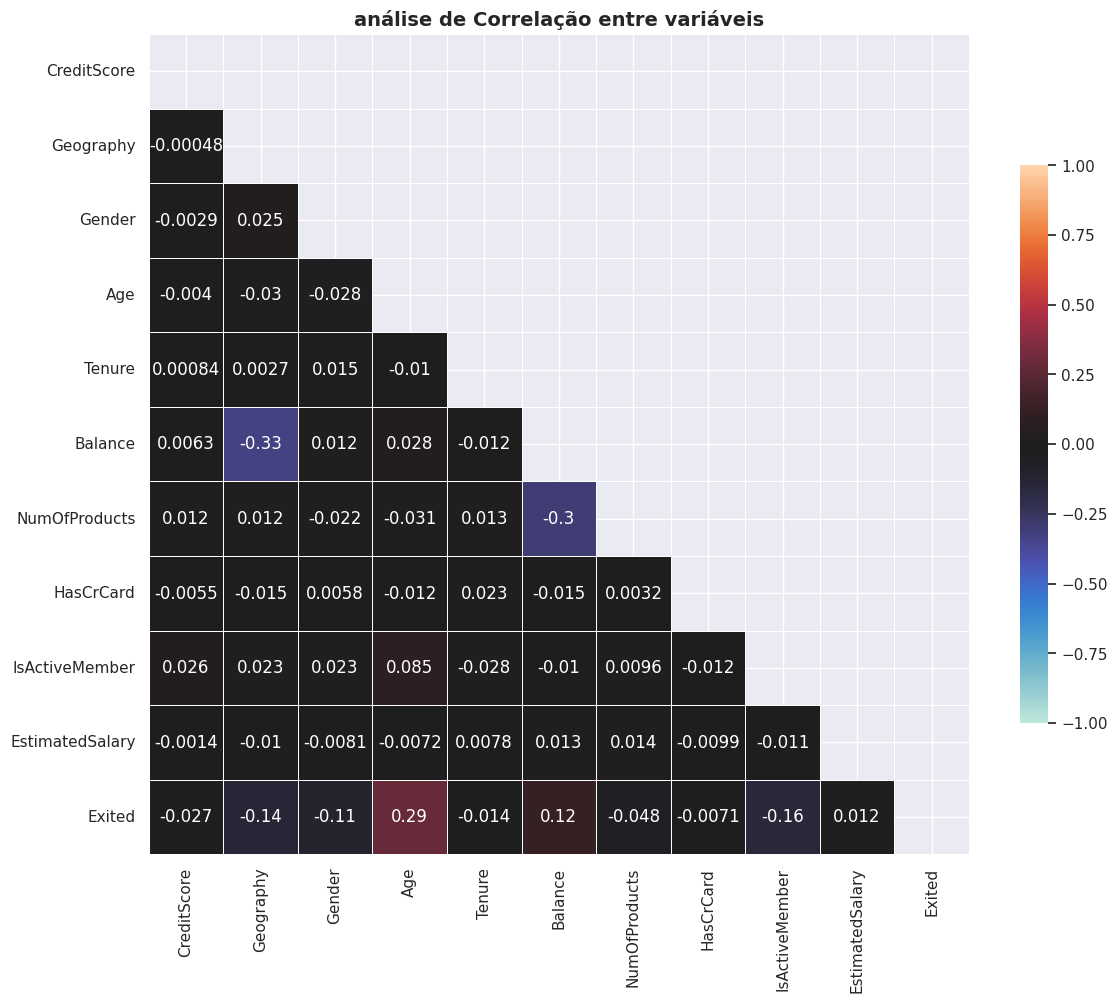

In [57]:
# gerando uma máscara para o formato do gráfico para cobrir a diagonal superior
mask = np.zeros_like(df_correl.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(12, 12))

# Criando objeto com as correlações
correl = df_correl.corr()

# Plotando o gráfico
sns.heatmap(data=correl, mask=mask, vmin=-1, vmax=1, annot=True, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('análise de Correlação entre variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f"../imagens/correlacao.png", bbox_inches='tight')
plt.show()

Podemos notar que os pares de variáveis com maior correlação são:

- **(Balance, Geography)**
- **(NumOfProducts, Balance)**
- **(Exited, Age)**

É importante ressaltar que aqui não diferenciamos homens de mulheres, talvez cabe separa esses dois e ver se existe uma correlação maior se considerarmos apenas mulheres ou homens. O mesmo vale para variável **Geography**.